<a href="https://colab.research.google.com/github/rpasquini/defidata/blob/main/AAVE_graph_request_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples of querys to AAVE's graph 

1. USD ETH Reference prices.
Entiendo que estos son precios del oraculo que quedaron grabados en el Graph. Revisar

usdEthPriceHistoryItems

2. Liquidations

Realizar time series plot con numero de liquidaciones


# Links 
Graph QL Basics
https://thegraph.com/docs/en/querying/graphql-api/

https://graphql.org/learn/queries/

AAVE's graph documentation 
https://docs.aave.com/developers/v/2.0/getting-started/using-graphql

Playground

https://thegraph.com/hosted-service/subgraph/aave/protocol-multy-raw


In [1]:
import requests
from pprint import pprint

In [2]:
#(See https://thegraph.com/hosted-service/subgraph/aave/protocol-v2?version=current)
subgraph_http_address='https://api.thegraph.com/subgraphs/name/aave/protocol-v2'

# function to use requests.post to make an API call to the subgraph url
def run_query(query):

    # endpoint where you are making the request
    request = requests.post(subgraph_http_address,
                            json={'query': query})
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed. return code is {}.      {}'.format(request.status_code, query))

The skip parameter can be used to skip entities and paginate. e.g. first:100 shows the first 100 entities and first:100, skip:100 shows the next 100 entities.

In [15]:
# Note 'usdEthPriceHistoryItems' ending in plural (instead of usdEthPriceHistoryItem) is the call to the generic class of elements.
# It allows retrieving several elements instead of only one. 
# example: obtain first 10 elements after skipping 5000
query = """
{
usdEthPriceHistoryItems(skip:5000, first: 10) {
    id
		price
    timestamp
  	oracle {
  	  id
  	}
    }
  }
"""
result = run_query(query)

In [16]:
result

{'data': {'usdEthPriceHistoryItems': [{'id': '1143103747',
    'price': '1853533762117476',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103749',
    'price': '1853533762117476',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103751',
    'price': '1853533762117476',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103752',
    'price': '1853533762117476',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103753',
    'price': '1853533762117476',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103754',
    'price': '1853533762117476',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103759',
    'price': '1853113346923434',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103943',
    'price': '1852693122401780',
    'timestamp': 1607682166,
    'oracle': {'id': '1'}},
   {'id': '1143105240',
    'price': '185269312240178

Querying specific dates
- Querys use timestamps

In [3]:
from datetime import datetime
timestamp = 1607682157
dt_object = datetime.fromtimestamp(timestamp)
dt_object

datetime.datetime(2020, 12, 11, 10, 22, 37)

Get prices after Nov 4th 2022

In [4]:
#datetime to timestamp
datetime_as_timestamp=datetime(2022, 11, 4).timestamp()
datetime_as_timestamp

1667520000.0

In [38]:
str(int(datetime_as_timestamp))

'1667520000'

Example 2: Using **where** to filter with _gt suffix 
- It is unrecommended to use big skip values. Preferable to use a filter in the query
- Note the use of orderby and orderdirection 

In [54]:
query = """
{
  usdEthPriceHistoryItems(first: 1000, orderBy: timestamp, orderDirection: asc, where: {timestamp_gt:"""+str(int(datetime_as_timestamp))+"""}) {
    id
    timestamp
    price
    oracle
    }
  }
"""
result = run_query(query)

Note: 
If a client needs to retrieve a large number of entities, it is much more performant to base queries on an attribute and filter by that attribute. For example, a client would retrieve a large number of tokens using this query:
```
query manyTokens($lastID: String) {
  tokens(first: 1000, where: { id_gt: $lastID }) {
    id
    owner
  }
}
```

In [9]:
import pandas as pd

In [56]:
df=pd.DataFrame.from_records(result['data']['usdEthPriceHistoryItems'])
df.head()

,id,timestamp,price
0,1589304460,1667521415,649752999174408
1,1589320423,1667523335,649565859837487
2,15893503102,1667526923,650030226405527
3,1589380276,1667530535,648962169454092
4,1589405739,1667533619,645705924219251


In [57]:
df['datetime']=df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [58]:
df['ETHUSD']=1/(df['price'].astype(int)*1e-18)
df

,id,timestamp,price,datetime,ETHUSD
0,1589304460,1667521415,649752999174408,2022-11-04 00:23:35,1539.046378
1,1589320423,1667523335,649565859837487,2022-11-04 00:55:35,1539.489776
2,15893503102,1667526923,650030226405527,2022-11-04 01:55:23,1538.390000
3,1589380276,1667530535,648962169454092,2022-11-04 02:55:35,1540.921870
4,1589405739,1667533619,645705924219251,2022-11-04 03:46:59,1548.692621
...,...,...,...,...,...
995,15943984100,1668136007,805483538705673,2022-11-11 03:06:47,1241.490300
996,1594399256,1668136103,812502430992546,2022-11-11 03:08:23,1230.765548
997,159440099,1668136307,808456252623197,2022-11-11 03:11:47,1236.925309
998,1594405740,1668136883,813636548553761,2022-11-11 03:21:23,1229.050000


In [59]:
df.index=df.datetime

In [60]:
df

,id,timestamp,price,datetime,ETHUSD
datetime,,,,,
2022-11-04 00:23:35,1589304460,1667521415,649752999174408,2022-11-04 00:23:35,1539.046378
2022-11-04 00:55:35,1589320423,1667523335,649565859837487,2022-11-04 00:55:35,1539.489776
2022-11-04 01:55:23,15893503102,1667526923,650030226405527,2022-11-04 01:55:23,1538.390000
2022-11-04 02:55:35,1589380276,1667530535,648962169454092,2022-11-04 02:55:35,1540.921870
2022-11-04 03:46:59,1589405739,1667533619,645705924219251,2022-11-04 03:46:59,1548.692621
...,...,...,...,...,...
2022-11-11 03:06:47,15943984100,1668136007,805483538705673,2022-11-11 03:06:47,1241.490300
2022-11-11 03:08:23,1594399256,1668136103,812502430992546,2022-11-11 03:08:23,1230.765548
2022-11-11 03:11:47,159440099,1668136307,808456252623197,2022-11-11 03:11:47,1236.925309


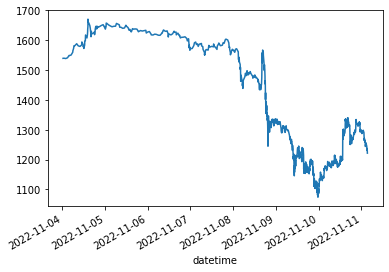

In [61]:
df.ETHUSD.plot()

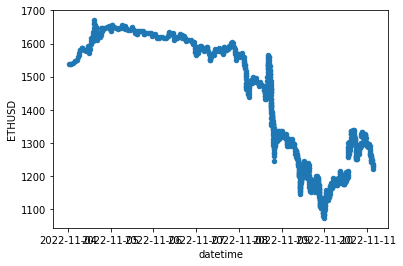

In [62]:
df.plot.scatter('datetime','ETHUSD')

# Liquidaciones

liquidator: Es la address del liquidador  
user{id}:    Es el address del usuario liquidado
principalAmount: El monto de la deuda (principal) que se repaga  
collateralAmount: Monto del colateral que se obtiene
 
CollateralReserve: Se refiere los datos de la reserva de la moneda (en el protocolo) del colateral del prestamo que se está liquidando \\
principalReserve: Se refiere a los datos de la reserva de la moneda  (en el protocolo) en la que se tomó el crédito.


In [9]:
query = """

{liquidationCalls(first: 10){
  id
  action
  
  liquidator
  principalAmount
  collateralAmount
  

  timestamp
  collateralReserve{id underlyingAsset symbol}
  principalUserReserve{id }
  pool{id }
  user{id}
 
  collateralAssetPriceUSD
  borrowAssetPriceUSD
  
}}
"""
result = run_query(query)

In [10]:
result

{'data': {'liquidationCalls': [{'id': '11471171:28:0x9ef1c383398cee036a85ca024db051b7a1c8bc692e703fe1b230da9e2305eb4a:56:56',
    'action': 'LiquidationCall',
    'liquidator': '0x7a512a3cf68df453ec76d487e3eaffecd74d6887',
    'timestamp': 1608214767,
    'collateralAmount': '17805688961227928811',
    'collateralReserve': {'id': '0x6b175474e89094c44da98b954eedeac495271d0f0xb53c1a33016b2dc2ff3653530bff1848a515c8c5',
     'underlyingAsset': '0x6b175474e89094c44da98b954eedeac495271d0f',
     'symbol': 'DAI'},
    'principalAmount': '74305',
    'principalUserReserve': {'id': '0xa53fe221bd861f75907d8fd496db1c70779721aa0x2260fac5e5542a773aa44fbcfedf7c193bc2c5990xb53c1a33016b2dc2ff3653530bff1848a515c8c5'},
    'pool': {'id': '0xb53c1a33016b2dc2ff3653530bff1848a515c8c5'},
    'user': {'id': '0xa53fe221bd861f75907d8fd496db1c70779721aa'},
    'collateralAssetPriceUSD': '1.001979417875997056779844810469726',
    'borrowAssetPriceUSD': '22867.05548912266602380709495821367'},
   {'id': '11471182:

In [7]:
start=datetime(2022, 11, 22).timestamp()
end=datetime(2022, 11, 23).timestamp()

In [76]:
print(start, end)

1669075200.0 1669161600.0


Combining conditions

```(where: { _or: [{ someField: "1" }, { someField2: "2" }] })``` \\

```where: {
    and: [{ name: { contains: "a" } }, { endDate: { gte: "2017-12-31" } }]
  }```

In [77]:
query="""
{liquidationCalls(first: 10, 
filter:{timestamp: { between: [1669075200, 1669161600]}}
){
  id
  action
  
  liquidator
  timestamp
  collateralAmount
  collateralReserve{id underlyingAsset symbol}
  principalAmount
  principalUserReserve{id }
  pool{id }
  user{id}
 
  collateralAssetPriceUSD
  borrowAssetPriceUSD
  
}}
"""
result = run_query(query)
result

{'data': {'liquidationCalls': [{'id': '11471171:28:0x9ef1c383398cee036a85ca024db051b7a1c8bc692e703fe1b230da9e2305eb4a:56:56',
    'action': 'LiquidationCall',
    'liquidator': '0x7a512a3cf68df453ec76d487e3eaffecd74d6887',
    'timestamp': 1608214767,
    'collateralAmount': '17805688961227928811',
    'collateralReserve': {'id': '0x6b175474e89094c44da98b954eedeac495271d0f0xb53c1a33016b2dc2ff3653530bff1848a515c8c5',
     'underlyingAsset': '0x6b175474e89094c44da98b954eedeac495271d0f',
     'symbol': 'DAI'},
    'principalAmount': '74305',
    'principalUserReserve': {'id': '0xa53fe221bd861f75907d8fd496db1c70779721aa0x2260fac5e5542a773aa44fbcfedf7c193bc2c5990xb53c1a33016b2dc2ff3653530bff1848a515c8c5'},
    'pool': {'id': '0xb53c1a33016b2dc2ff3653530bff1848a515c8c5'},
    'user': {'id': '0xa53fe221bd861f75907d8fd496db1c70779721aa'},
    'collateralAssetPriceUSD': '1.001979417875997056779844810469726',
    'borrowAssetPriceUSD': '22867.05548912266602380709495821367'},
   {'id': '11471182:

https://aave.blockanalitica.com/wallets/0x57e04786e231af3343562c062e0d058f25dace9e/

Query a las liquidaciones que liquidaron al usuario "0x57e04786e231af3343562c062e0d058f25dace9e", que es el famoso Aavi que tomo un prestamo en CRV (usando USDC como colateral). 
El protocolo lo liquidó a tiempo, los liquidadores salieron a pagar el CRV y se llevaron el colateral en USDC.

En el query estamos pidiendo las liquidationCalls que tienen al usuario que fue liquidado (un nested object con id del usuario) con el id "0x57e04786e231af3343562c062e0d058f25dace9e".
Además estoy filtrando los resultados, quedandome solo con los timestamp entre el 22 y 23 de noviembre (que es la fecha en que ocurrió el ataque).


Notar el uso del guion bajo cuando nos referimos al contenido del objeto user.
Notar tambien el uso del between.

In [21]:
query="""
{
  liquidationCalls(first: 1000, 
    where:{user_:{id:"0x57e04786e231af3343562c062e0d058f25dace9e"}},
    filter:{timestamp: { between: [1669075200, 1669161600]}}
  ) 
  {
    id
    timestamp
    user{id}
    collateralReserve{id underlyingAsset symbol}
    collateralUserReserve{id reserve{id underlyingAsset symbol decimals totalLiquidity totalDeposits} }
 
    principalReserve{id underlyingAsset symbol}
    collateralAssetPriceUSD
    borrowAssetPriceUSD

}}
"""
result = run_query(query)


In [17]:
pd.DataFrame.from_records(result['data']['liquidationCalls'])

,id,timestamp,user,collateralReserve,principalReserve
0,16025860:1:0x6d75ebed779d6d2309ffbd45c4a9e0bb7...,1669123883,{'id': '0x57e04786e231af3343562c062e0d058f25da...,{'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...,{'id': '0xd533a949740bb3306d119cc777fa900ba034...
1,16025860:33:0x30c4a3af747f3fa3cea6fdc9a688abf4...,1669123883,{'id': '0x57e04786e231af3343562c062e0d058f25da...,{'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...,{'id': '0xd533a949740bb3306d119cc777fa900ba034...
2,16025861:1:0xca0de303ded3e9f91705799cef3fee023...,1669123895,{'id': '0x57e04786e231af3343562c062e0d058f25da...,{'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...,{'id': '0xd533a949740bb3306d119cc777fa900ba034...
3,16025861:1:0xca0de303ded3e9f91705799cef3fee023...,1669123895,{'id': '0x57e04786e231af3343562c062e0d058f25da...,{'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...,{'id': '0xd533a949740bb3306d119cc777fa900ba034...
4,16025861:1:0xca0de303ded3e9f91705799cef3fee023...,1669123895,{'id': '0x57e04786e231af3343562c062e0d058f25da...,{'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...,{'id': '0xd533a949740bb3306d119cc777fa900ba034...
...,...,...,...,...,...
380,16027234:184:0xae7d37987ae0fde23441340f6253b8f...,1669140539,{'id': '0x57e04786e231af3343562c062e0d058f25da...,{'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...,{'id': '0xd533a949740bb3306d119cc777fa900ba034...
381,16027235:3:0xd327af0d18ffa792581e7bfff18a6190f...,1669140551,{'id': '0x57e04786e231af3343562c062e0d058f25da...,{'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...,{'id': '0xd533a949740bb3306d119cc777fa900ba034...
382,16027235:5:0x0cfc64a1afb7f3e7ae502ced81f14d61f...,1669140551,{'id': '0x57e04786e231af3343562c062e0d058f25da...,{'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...,{'id': '0xd533a949740bb3306d119cc777fa900ba034...
383,16027236:129:0x505ca6bd246c340730907823282339c...,1669140563,{'id': '0x57e04786e231af3343562c062e0d058f25da...,{'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...,{'id': '0xd533a949740bb3306d119cc777fa900ba034...
